# Desafio do Módulo 1
## Bootcamp: Analista de Machine Learning

## Objetivos

Exercitar os seguintes conceitos trabalhados no Módulo:

* Análise exploratória dos dados (EDA - Exploratory Data Analysis) 
* Preparação dos dados 
* Análise de modelos Enunciado

Neste desafio serão abordados todos os conceitos apresentados durante a disciplina Fundamentos de Machine Learning (FAM). Para este desafio será utilizada uma versão modificada do dataset “Bike Sharing” disponível no UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset). Esse dataset contém um conjunto de informações sobre o compartilhamento de bicicletas. Existem informações sobre as condições climáticas e dados sobre a locação das bicicletas. Para este desafio é necessário baixar o arquivo “comp_bikes_mod.csv” presente neste link: https://drive.google.com/open?id=1gUV6yHZfHWBQoHxApg6VZ85oVKgIlxx4.

## Atividades

Os alunos deverão desempenhar as seguintes atividades:

* Acessar o Google Colaboratory 
* Realizar o upload do dataset “comp_bikes_mod.csv” e responder as perguntas abaixo:

In [71]:
#importando as bibliotecas
import pandas as pd #biblioteca utilizada para o tratamento de dados via dataframes 
import numpy as np #biblioteca utilizada para o tratamento de valores numéricos (vetores e matrizes)
import matplotlib.pyplot as plt #biblioteca utilizada para construir os gráficos
import seaborn as sn #biblioteca utilizada para os plots mais bonitos
from sklearn.linear_model import LinearRegression #importa o modelo de regressão linear univariada
from sklearn.tree import DecisionTreeRegressor #importa o modele de árvore de decisão
from sklearn.metrics import r2_score # método para o cálculo do R2 (coeficiente de determinação)

In [72]:
# Carregando csv
df = pd.read_csv('comp_bikes_mod.csv')

In [73]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


# Pergunta 1
No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?

a) (15,1345) 

b) (17,17379)

c) (1345,15) 

d) (17379,17) 

R: d

In [74]:
# Conferindo dimensão do dataset carregado
df.shape

(17379, 17)

# Pergunta 2
 Quantos tipos diferentes de dados existem no dataset do desafio?

 a) 17 
 b) 2 
 c) 3 
 d) 12 

 R: b

In [75]:
# verificando os tipos de variáveis e se existem ou não valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       15641 non-null float64
dteday        15641 non-null object
season        15641 non-null float64
yr            15641 non-null float64
mnth          15641 non-null float64
hr            15641 non-null float64
holiday       15641 non-null float64
weekday       15641 non-null float64
workingday    15641 non-null float64
weathersit    15641 non-null float64
temp          15641 non-null float64
atemp         15641 non-null float64
hum           15641 non-null float64
windspeed     15641 non-null float64
casual        15641 non-null float64
registered    15641 non-null float64
cnt           15641 non-null float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [10]:
# Verificando a quantidade de valores nulos em cada coluna (análise básica)
df.isnull().sum()

instant       1738
dteday        1738
season        1738
yr            1738
mnth          1738
hr            1738
holiday       1738
weekday       1738
workingday    1738
weathersit    1738
temp          1738
atemp         1738
hum           1738
windspeed     1738
casual        1738
registered    1738
cnt           1738
dtype: int64

In [11]:
# Verificando a estatística básica do dataset (análise básica)
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000
mean,8676.513842,2.503420,0.501758,6.536091,11.521258,0.028131,2.999233,0.682118,1.423950,0.497062,0.476281,0.627579,0.189247,35.583147,153.644972,189.919826
std,5010.773755,1.107636,0.500013,3.441490,6.917606,0.165353,2.005300,0.465668,0.638982,0.192451,0.172520,0.192893,0.122188,49.226455,151.750573,181.972508
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4335.000000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8678.000000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13005.000000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17377.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Pergunta 3
Qual é a proporção (em %) de valores nulos existente na coluna "temp" (temperatura ambiente normalizada)?

 a) 0%

 b) 10%

 c) 5%

 d) 15% 

 R: b

In [76]:
# Total de dados faltantes na coluna "temp"
na_temp = df['temp'].isna().sum()
# Total de dados
total_temp = len(df['temp'])
# percent = dados_faltantes/total_dados
percent_na_temp = na_temp/total_temp
percent_na_temp


0.10000575407100523

# Pergunta 4

Após retirar as linhas que contém valores nulos para a coluna "dteday", passamos a contar com quantas instancias e atributos, respectivamente?

a) (17379,17)

b) (17,15641)

c) (15641,17) 

d) (17,17379) 

R: c

In [77]:
# Excluindo linhas com dados faltantes na coluna "dteday"
df.dropna(subset=['dteday'], inplace=True)
df.shape

(15641, 17)

# Pergunta 5
Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Qual é o valor médio para os dados da coluna "temp" (temperatura ambiente normalizada)?

a) 0,156 

b) 0,192

c) 1,192 

d) 0,496 

R: d

In [78]:
# Calculando a média da coluna "temp"
df['temp'].mean()

0.4969259206597582

# Pergunta 6
Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Qual é o desvio padrão para os dados da coluna "windspeed" (velocidade do vento normalizada)?

a) 1,122 

b) 0,189

c) 0,122
 
d) 0,192 

R: c

In [79]:
# Calculando o desvio padrão da coluna "windspeed"
df['windspeed'].std()

0.12230930508286268

# Pergunta 7
Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Transforme a coluna "season" em valores categóricos. Quantas categorias diferentes existem?
a) 4 

b) 2 

c) 3

d) 1

R: a

In [80]:
# Transformando a coluna "season" em categórico
df['season'] = pd.Categorical(df.season)
# Filtrando as categorias distintas de 'season'
df['season'].unique()

[1.0, NaN, 2.0, 3.0, 4.0]
Categories (4, float64): [1.0, 2.0, 3.0, 4.0]

# Pergunta 8
Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Transforme a coluna "dteday" no tipo "datetime". Qual é a última data presente no dataset (YYYY-MM-DD)?

a) 2012-12-31 

b) 2014-12-31

c) 2012-01-31

d) 2012-01-31

R: a

In [81]:
# Transformando a coluna "dteday" para o tipo datetime
df['dteday'] = pd.to_datetime(df['dteday'], infer_datetime_format=True)
# Buscando os 5 últimos dados do dataframe
df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17373,17374.0,2012-12-31,1.0,1.0,12.0,18.0,0.0,1.0,1.0,2.0,0.26,NaN,0.48,0.1343,10.0,112.0,122.0
17374,17375.0,2012-12-31,NaN,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0
17375,17376.0,2012-12-31,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,NaN,NaN,89.0
17377,NaN,2012-12-31,1.0,1.0,NaN,NaN,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0
17378,NaN,2012-12-31,NaN,1.0,NaN,23.0,0.0,1.0,1.0,1.0,NaN,0.2727,0.65,0.1343,12.0,37.0,49.0


# Pergunta 9
Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Considerendo o boxplot da variável "windspeed" (velocidade do vento) é CORRETO afirmar?

 a) Não existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot. 

 b) Existem possíveis outliers, pois não existem marcações (pontos) foras dos limites do boxplot. 

 c) Existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot. 

 d) Não existem possíveis outliers, pois não existem marcações (pontos) foras dos limites do boxplot. 

 R: c

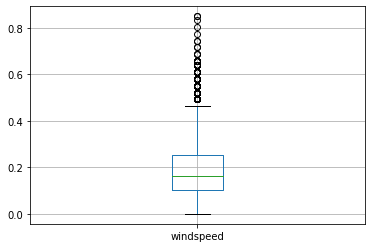

In [82]:
# Plotando boxplot da variável "windspeed"
df[['windspeed']].boxplot()

# Pergunta 10
Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Selecione as colunas "season", "temp", "atemp", "hum", "windspeed". Plot a matriz de correlação. Sobre as variáveis "hum" e "cnt" é CORRETO afirmar:

a) Possuem alta correlação linear negativa. 

b) Possuem alta correlação linear positiva.

c) Possuem baixa correlação linear negativa.

d) Possuem baixa correlação linear positiva. 

R: c

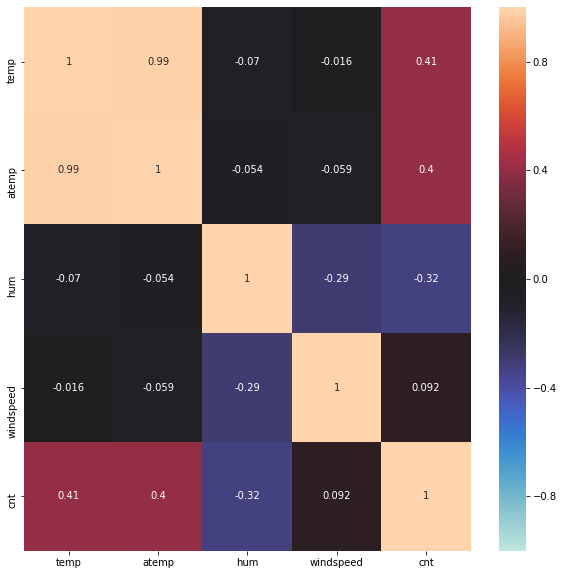

In [41]:
# Separando as variáveis necessárias
new_df = df[["season", "temp", "atemp", "hum", "windspeed", "cnt"]]
#realizando o plot da matriz de correlação
plt.figure(figsize=(10, 10))
matriz_de_correlação = new_df.corr()  #construindo a matriz de correlação
sn.heatmap(matriz_de_correlação, annot=True,vmin=-1, vmax=1,center= 0)  #plotando a matriz de correlação com o seaborn
plt.show()

# Pergunta 11
Preencha os valores nulos das colunas "hum","cnt" e "casual" com os valores médios. Utilize as variáveis "hum" e "casual" como independentes e a "cnt" como dependente. Aplique uma regressão linear. Qual o valor de R2? Utilize as entradas como teste.

a) 0.40 

b) 0.80 

c) -0.40 

d) -0.80 

R: a

In [85]:
# Preenchendo os valores nulos das colunas "hum","cnt" e "casual" com os valores médios
df.update(df['hum'].fillna(df['hum'].mean()))
df.update(df['cnt'].fillna(df['cnt'].mean()))
df.update(df['casual'].fillna(df['casual'].mean()))
# Verificando os valores nulos
df.isna().sum()

instant       1581
dteday           0
season        1580
yr            1565
mnth          1579
hr            1573
holiday       1565
weekday       1563
workingday    1544
weathersit    1563
temp          1575
atemp         1565
hum              0
windspeed     1559
casual           0
registered    1551
cnt              0
dtype: int64

In [86]:
#Realiza a construção do modelo de regressão
reg= LinearRegression()
x=df[['hum', 'casual']].values  #variável independente 
Y=df['cnt'].values #variável dependente 
regressao = reg.fit (x,Y) # encontra os coeficientes (realiza a regressão)
#realiza a previsão
previsao=reg.predict(x)
#parâmetros encontrados
print('Y = {}X {}'.format(reg.coef_,reg.intercept_))

R_2 = r2_score(Y, previsao)  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2):", R_2)

Y = [-99.75012328   2.21512197]X 173.2933750513558
Coeficiente de Determinação (R2): 0.4059859251122173


# Pergunta 12
Utilize os mesmos dados da questão anterior ("hum" e "casual" como variáveis independentes e "cnt" como variavel dependente). Aplique a árvore de decisão como regressão. Qual é o valor aproximado de R2? Utilize as entradas como teste e valores "default".

a) 1,00 

b) 0,70 

c) 0,30 

d) 0,40 

R: b

In [87]:
tree = DecisionTreeRegressor() # Inicializa 
x=df[['hum', 'casual']].values  #variável independente 
Y=df['cnt'].values #variável dependente 
      
tree_fit = tree.fit(x, Y) # fit encontra padrões nos dados

previsao=tree.predict(x)

print('Y = {}X {}'.format(reg.coef_,reg.intercept_))

R_2 = r2_score(Y, previsao)  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2):", R_2)

Y = [-99.75012328   2.21512197]X 173.2933750513558
Coeficiente de Determinação (R2): 0.7098339715834964


# Pergunta 13
Comparando os valores de R2 encontrado com a regressão linear e com a árvore de decisão, é CORRETO afirmar:

a) Os valores encontrados pela árvore de decisão como regressor e a regressão linear são próximos. 

b) O valor encontrado pela árvore de decisão foi negativo. 

c) O valor obtido pela árvore de decisão como regressor apresenta maior R2 

d) O valor encontrado pela regressão linear é superior ao encontrado pela árvore de decisão. 

R: c

# Pergunta 14
Com base na árvore de decisão é CORRETO afirmar:

a) A análise de regressão com a árvore de decisão só pode ser realizada com valores categóricos. 

b) Ávore de Decisão é utilizada apenas para a classificação de dados contínuos. 

c) Não é possível encontrar os limites de separação entre os conjuntos de dados a partir de uma classificação realizada através da árvore de decisão. 

d) Pode ser utilizada para classificação e regressão. 

R: d

# Pergunta 15
Comparando o SVM com a árvore de decisão é CORRETO afirmar:

a) Árvore de decisão encontra os hiperplanos de separação do mesmo modo que o SVM. 

b) Através da Árvore de Decisão não é possível encontrar os limiares de separação entre as classes.

c) SVM encontra o hiperplano que gera a maior separação entre os dados. 

d) SVM e Árvore de Decisão só podem ser utilizados para modelos de classificação. 

R: c